In [3]:
import os
import dotenv
import pandas as pd
from sqlalchemy import create_engine

dotenv.load_dotenv(override=True, dotenv_path=".env")

username = os.getenv("username")
password = os.getenv("password")
host = os.getenv("host")
dbname = "Titanic"

conn_string = "mysql+pymysql://" + username + ":" + password + "@" + host + "/" + dbname
db_engine = create_engine(conn_string)

query = "SELECT * FROM titanic"
titanic = pd.read_sql(sql=query, con=db_engine)

In [5]:
titanic

,PassengerId,PClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,EmbarkDate
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,,S,0,10-4-1912
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,1,11-4-1912
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,,S,1,10-4-1912
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,1,10-4-1912
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,,S,0,10-4-1912
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.05,,S,0,10-4-1912
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.90,C105,C,1,11-4-1912
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,,S,0,10-4-1912
1307,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.05,,S,0,10-4-1912


In [12]:
titanic.columns

Index(['PassengerId', 'PClass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived', 'EmbarkDate'],
      dtype='object')

In [20]:
titanic.Fare.describe()

count    1309.000000
mean       33.270825
std        51.747086
min         0.000000
25%         7.900000
50%        14.450000
75%        31.280000
max       512.330000
Name: Fare, dtype: float64

In [23]:
titanic = titanic.replace ("",None)

In [26]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   PClass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     1309 non-null   int64  
 12  EmbarkDate   1307 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 133.1+ KB


In [29]:
filtro_nulli=titanic.Embarked.isna()
titanic.loc[filtro_nulli]

,PassengerId,PClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,EmbarkDate
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,None,1,None
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,None,1,None


In [35]:
import seaborn as sns

<Axes: ylabel='count'>

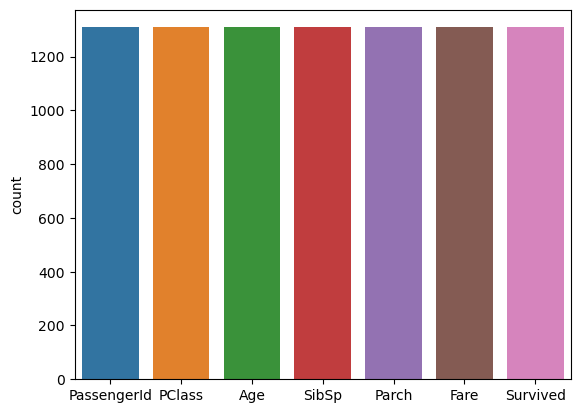

In [40]:
sns.countplot(data=titanic)

<Axes: xlabel='PClass', ylabel='Age'>

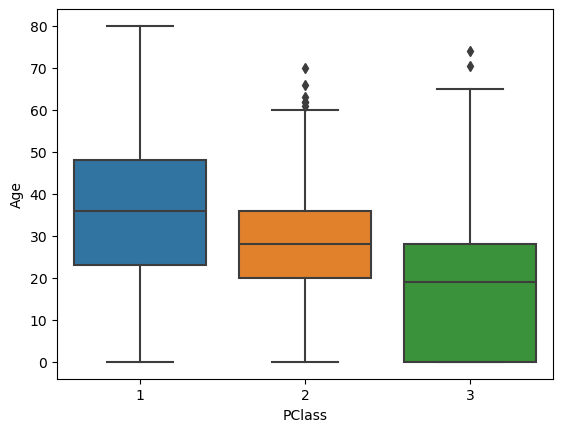

In [43]:
sns.boxplot(data=titanic, x="PClass" , y="Age")

<Axes: xlabel='PClass', ylabel='Fare'>

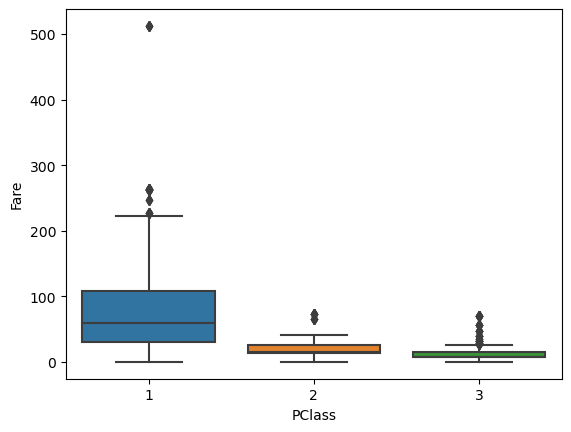

In [46]:
sns.boxplot(data=titanic,x="PClass" , y="Fare")

In [65]:
stock = pd.read_csv ("stockdata/stockdata.csv")
stock.shape

(2306, 6)

In [67]:
stock.tail(10)

,MSFT,IBM,SBUX,AAPL,GSPC,Date
2296,52.419998,126.099998,57.630001,98.120003,1926.819946,2016-02-17
2297,52.189999,132.449997,56.959999,96.260002,1917.829956,2016-02-18
2298,51.820000,133.080002,57.669998,96.040001,1917.780029,2016-02-19
2299,52.650002,133.770004,58.869999,96.879997,1945.500000,2016-02-22
2300,51.180000,132.399994,58.459999,94.690002,1921.270020,2016-02-23
2301,51.360001,132.800003,58.110001,96.099998,1929.800049,2016-02-24
2302,52.099998,134.500000,58.750000,96.760002,1951.699951,2016-02-25
2303,51.299999,132.029999,58.340000,96.910004,1948.050049,2016-02-26
2304,50.880001,131.029999,58.209999,96.690002,1932.229980,2016-02-29
2305,52.580002,134.369995,60.040001,100.529999,1978.349976,2016-03-01


In [71]:
stock = stock.set_index("Date")

<Axes: xlabel='Date'>

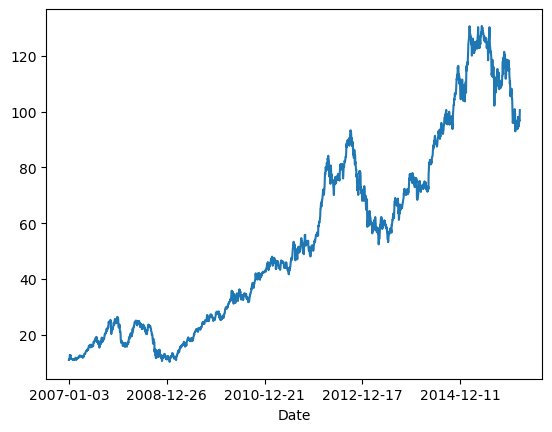

In [73]:
stock.AAPL.plot()

<Axes: xlabel='Date'>

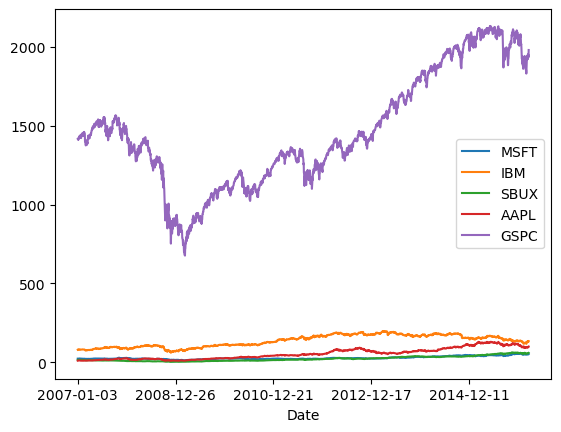

In [75]:
stock.plot()

<Axes: xlabel='Date'>

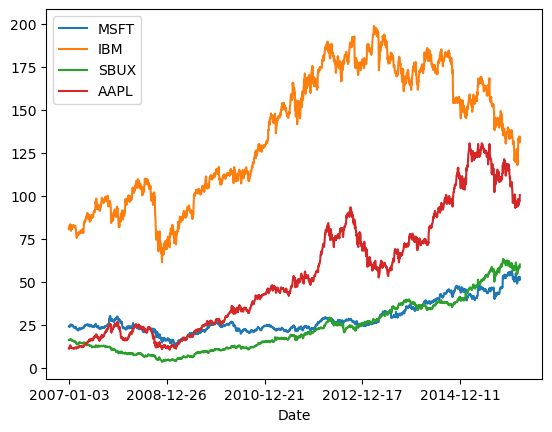

In [77]:
stock.loc[:,["MSFT" , "IBM" , "SBUX" , "AAPL"]].plot()

<Axes: xlabel='Date'>

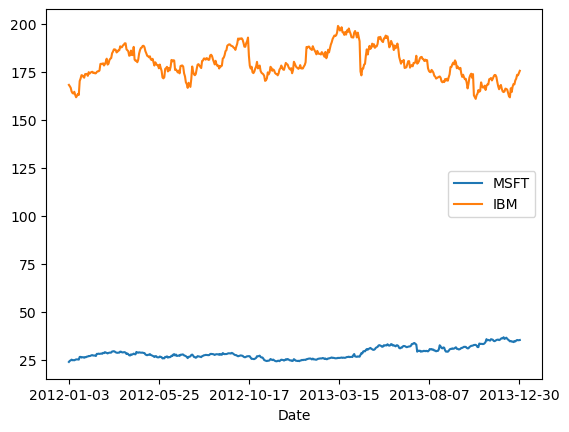

In [85]:
filtro_2012 = stock.index.str.contains("2012")
filtro_2013 = stock.index.str.contains("2013")
stock.loc[filtro_2012 |filtro_2013, [ "MSFT","IBM"]].plot()

<Axes: ylabel='Frequency'>

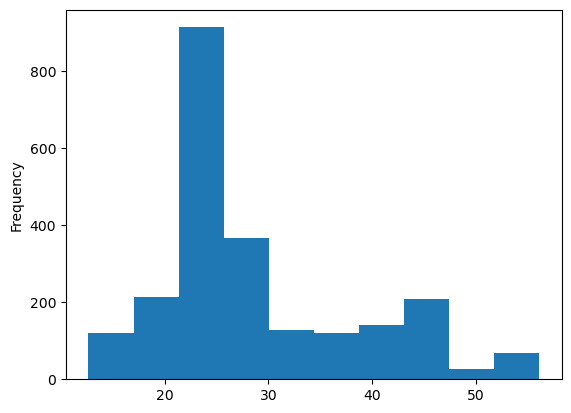

In [87]:
stock.MSFT.plot(kind="hist")

In [6]:
import pandas as pd

In [10]:
file_path = "metal_bands_2017.csv"
metal = pd.read_csv(file_path,encoding = "latin1")

In [12]:
metal

,Unnamed: 0,band_name,fans,formed,origin,split,style
0,0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,4,Amon Amarth,3054,1988,Sweden,-,Melodic death
...,...,...,...,...,...,...,...
4995,4995,Atara,0,2006,France,2006,"Black,Grindcore"
4996,4996,Avicularia,0,2003,Croatia,-,Avantgarde death
4997,4997,Awake,0,2006,United Kingdom,2006,"Heavy,Progressive"
4998,4998,Axatak,0,1983,Australia,1988,"Hard rock,Heavy"


In [16]:
metal.shape

(5000, 7)

In [19]:
metal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5000 non-null   int64 
 1   band_name   5000 non-null   object
 2   fans        5000 non-null   int64 
 3   formed      5000 non-null   object
 4   origin      4992 non-null   object
 5   split       5000 non-null   object
 6   style       5000 non-null   object
dtypes: int64(2), object(5)
memory usage: 273.6+ KB


In [29]:
metal.head(10)

,band_name,fans,formed,origin,split,style
Unnamed: 0,,,,,,
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988,Sweden,-,Melodic death
5,Slayer,2955,1981,USA,1981,Thrash
6,Death,2690,1983,USA,2001,"Progressive death,Death,Progressive thrash"
7,Dream Theater,2329,1985,USA,1985,Progressive
8,Black Sabbath,2307,1968,United Kingdom,-,"Doom,Heavy,Hard rock"


In [31]:
metal.formed.value_counts()

formed
2005    270
2007    265
2006    248
2008    227
2004    221
2003    217
2009    205
1998    203
2010    202
2001    189
1999    182
2002    179
2000    174
1995    169
1996    160
1997    159
1993    157
2011    153
2012    136
1994    132
2013    118
1989    102
1992    100
1990     98
2014     88
1991     77
1988     64
1985     60
1984     53
1986     53
1987     53
1983     42
1982     40
2015     36
1981     30
1979     26
1980     25
1976     17
1978     11
1977     11
1975      7
1968      7
1969      6
1972      5
2016      5
1973      4
-         4
1967      3
1974      3
1964      1
1965      1
1971      1
1970      1
Name: count, dtype: int64

In [49]:
metal.formed.describe()

count     5000
unique      53
top       2005
freq       270
Name: formed, dtype: object

In [53]:
import seaborn as sns

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fans', ylabel='Count'>

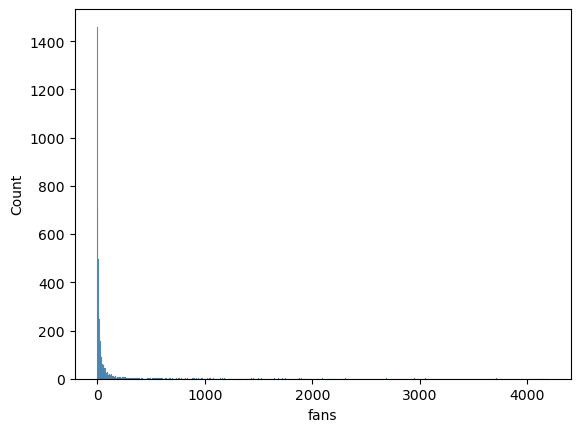

In [55]:
sns.histplot(data=metal, x="fans")

In [65]:
filtro_thrash = metal["style"].str.contains("Thrash")
filtro_prog = metal["style"].str.contains("Progressive")
metal_tp = metal.loc[filtro_thrash & filtro_prog ]

In [69]:
fans_by_nation = metal_tp.groupby("origin").fans.sum()

<Axes: ylabel='origin'>

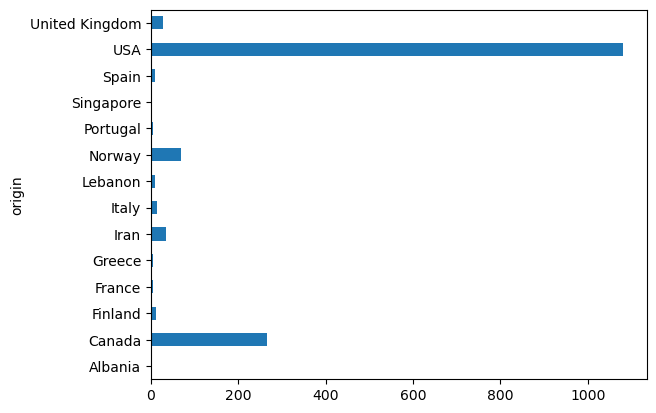

In [71]:
fans_by_nation.plot(kind="barh")

In [4]:
import pandas as pd

In [6]:
file_path = "party_NYC/party_in_nyc.csv"
party = pd.read_csv(file_path)

In [8]:
party.shape

(225414, 8)

In [12]:
party.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225414 entries, 0 to 225413
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Created Date   225414 non-null  object 
 1   Closed Date    224619 non-null  object 
 2   Location Type  225414 non-null  object 
 3   Incident Zip   224424 non-null  float64
 4   City           224424 non-null  object 
 5   Borough        225414 non-null  object 
 6   Latitude       223946 non-null  float64
 7   Longitude      223946 non-null  float64
dtypes: float64(3), object(5)
memory usage: 13.8+ MB


In [14]:
party.head(10)

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516
5,2015-12-31 00:08:05,2015-12-31 01:59:12,Residential Building/House,10467.0,BRONX,BRONX,40.858748,-73.865625
6,2015-12-31 00:11:40,2015-12-31 06:24:00,Residential Building/House,11230.0,BROOKLYN,BROOKLYN,40.617005,-73.956920
7,2015-12-31 00:12:13,2015-12-31 00:38:09,Residential Building/House,11215.0,BROOKLYN,BROOKLYN,40.665051,-73.981278
8,2015-12-31 00:12:37,2015-12-31 05:03:39,Residential Building/House,10463.0,BRONX,BRONX,40.875895,-73.912471
9,2015-12-31 00:14:13,2015-12-31 06:25:40,Store/Commercial,11372.0,JACKSON HEIGHTS,QUEENS,40.755584,-73.885201


In [26]:
party.loc[:, "Location Type"].value_counts()

Location Type
Residential Building/House    146040
Street/Sidewalk                42353
Store/Commercial               17617
Club/Bar/Restaurant            15766
Park/Playground                 3036
House of Worship                 602
Name: count, dtype: int64

In [32]:
party.groupby( ["City","Location Type"] ).City.count()

City      Location Type             
ARVERNE   House of Worship                8
          Park/Playground                 3
          Residential Building/House    462
          Store/Commercial                2
          Street/Sidewalk                35
                                       ... 
WOODSIDE  House of Worship                6
          Park/Playground                13
          Residential Building/House    903
          Store/Commercial               82
          Street/Sidewalk               147
Name: City, Length: 246, dtype: int64

In [34]:
party.describe()

,Incident Zip,Latitude,Longitude
count,224424.000000,223946.000000,223946.000000
mean,10720.020992,40.749730,-73.924889
std,576.827879,0.082068,0.063779
min,83.000000,40.498820,-74.251277
25%,10039.000000,40.684648,-73.958245
50%,10469.000000,40.739170,-73.929713
75%,11225.000000,40.829273,-73.893299
max,11697.000000,40.912178,-73.702303


In [40]:
location_counts = party["Location Type"].value_counts()
location_counts.iloc[0]

146040

In [42]:
import seaborn as sns

<Axes: xlabel='Borough', ylabel='count'>

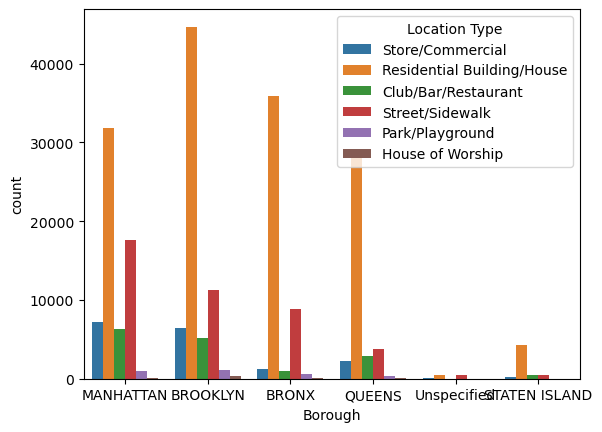

In [46]:
sns.countplot(data=party , x="Borough" , hue="Location Type")